In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
import os

df = pd.read_csv('Telkomsel_Data.csv')
print(df.head(10), "\n")
print(df.info(), "\n")

  ID Pelanggan  Durasi Langganan (bulan)  Jumlah Panggilan  \
0         P001                        13                83   
1         P002                        32                68   
2         P003                         2                42   
3         P004                        23                17   
4         P005                        18                21   
5         P006                         7                24   
6         P007                        32                 6   
7         P008                        23                10   
8         P009                        27                34   
9         P010                        24                28   

   Penggunaan Data (GB)  Tagihan Rata-rata Promosi Terakhir  Churn  
0                     4              30000            TIDAK     YA  
1                    10             100000            TIDAK  TIDAK  
2                    21             180000            TIDAK  TIDAK  
3                     5              6000

In [3]:
# Menghitung missing values
print(df.isnull().sum(), "\n")

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Menghapus kolom 'ID Pelanggan'
df.drop(columns=['ID Pelanggan'], inplace=True)

# mengganti isi kolom Promosi Terakhir dan Churn menjadi 1 dan 0
Promosi = df.replace(to_replace={'Promosi Terakhir': {'YA': 1, 'TIDAK': 0}})
Churn = Promosi.replace(to_replace={'Churn': {'YA': 1, 'TIDAK': 0}})
data2 = Churn
print(data2.head())

ID Pelanggan                0
Durasi Langganan (bulan)    0
Jumlah Panggilan            0
Penggunaan Data (GB)        0
Tagihan Rata-rata           0
Promosi Terakhir            0
Churn                       0
dtype: int64 

   Durasi Langganan (bulan)  Jumlah Panggilan  Penggunaan Data (GB)  \
0                        13                83                     4   
1                        32                68                    10   
2                         2                42                    21   
3                        23                17                     5   
4                        18                21                    10   

   Tagihan Rata-rata  Promosi Terakhir  Churn  
0              30000                 0      1  
1             100000                 0      0  
2             180000                 0      0  
3              60000                 0      1  
4              90000                 0      1  


C:\Users\ACER\AppData\Local\Temp\ipykernel_2680\3169057567.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Promosi = df.replace(to_replace={'Promosi Terakhir': {'YA': 1, 'TIDAK': 0}})
C:\Users\ACER\AppData\Local\Temp\ipykernel_2680\3169057567.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Churn = Promosi.replace(to_replace={'Churn': {'YA': 1, 'TIDAK': 0}})


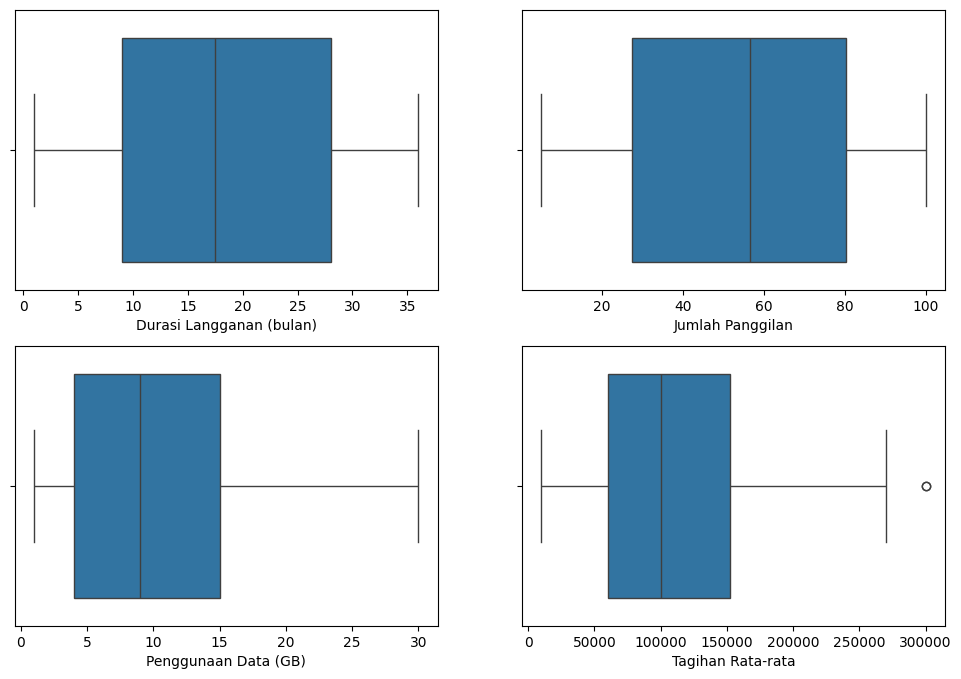

In [4]:
# mencari outlier
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Durasi Langganan (bulan)", data=data2, ax=axes[0, 0])
sns.boxplot(x="Jumlah Panggilan", data=data2, ax=axes[0, 1])
sns.boxplot(x="Penggunaan Data (GB)", data=data2, ax=axes[1, 0])
sns.boxplot(x="Tagihan Rata-rata", data=data2, ax=axes[1, 1])
plt.show()

In [5]:
# menghitung outlier pada Durasi Langganan (bulan)
Q1, Q3 = np.percentile(data2["Durasi Langganan (bulan)"], [25, 75])
selisih = Q3 - Q1
# menghitung batas bawah dan atas
bw1 = Q1 - 1.5 * selisih
ba1 = Q3 + 1.5 * selisih
print("Durasi Langganan (bulan)")
print("Q1: ", Q1, " Q3: ", Q3)
print("Selisih: ", selisih)
print("batas bawah: ", bw1)
print("batas atas: ", ba1, "\n")

# menghitung outlier pada Jumlah Panggilan
Q1, Q3 = np.percentile(data2["Jumlah Panggilan"], [25, 75])
selisih = Q3 - Q1
# menghitung batas bawah dan atas
bw2 = Q1 - 1.5 * selisih
ba2 = Q3 + 1.5 * selisih
print("Jumlah Panggilan")
print("Q1: ", Q1, " Q3: ", Q3)
print("Selisih: ", selisih)
print("batas bawah: ", bw2)
print("batas atas: ", ba2, "\n")

# menghitung outlier pada Penggunaan Data (GB)
Q1, Q3 = np.percentile(data2["Penggunaan Data (GB)"], [25, 75])
selisih = Q3 - Q1
# menghitung batas bawah dan atas
bw3 = Q1 - 1.5 * selisih
ba3 = Q3 + 1.5 * selisih
print("Penggunaan Data (GB)")
print("Q1: ", Q1, " Q3: ", Q3)
print("Selisih: ", selisih)
print("batas bawah: ", bw3)
print("batas atas: ", ba3, "\n")

# menghitung outlier pada tagihan rata-rata
Q1, Q3 = np.percentile(data2["Tagihan Rata-rata"], [25, 75])
selisih = Q3 - Q1
# menghitung batas bawah dan atas
bw4 = Q1 - 1.5 * selisih
ba4 = Q3 + 1.5 * selisih
print("Tagihan rata-rata")
print("Q1: ", Q1, " Q3: ", Q3)
print("Selisih: ", selisih)
print("batas bawah: ", bw4)
print("batas atas: ", ba4, "\n")

Durasi Langganan (bulan)
Q1:  9.0  Q3:  28.0
Selisih:  19.0
batas bawah:  -19.5
batas atas:  56.5 

Jumlah Panggilan
Q1:  27.5  Q3:  80.25
Selisih:  52.75
batas bawah:  -51.625
batas atas:  159.375 

Penggunaan Data (GB)
Q1:  4.0  Q3:  15.0
Selisih:  11.0
batas bawah:  -12.5
batas atas:  31.5 

Tagihan rata-rata
Q1:  60000.0  Q3:  152500.0
Selisih:  92500.0
batas bawah:  -78750.0
batas atas:  291250.0 



Nilai mean untuk mengganti outlier:  36 

Nilai mean untuk mengganti outlier:  100 

Nilai mean untuk mengganti outlier:  30 

Nilai mean untuk mengganti outlier:  270000 



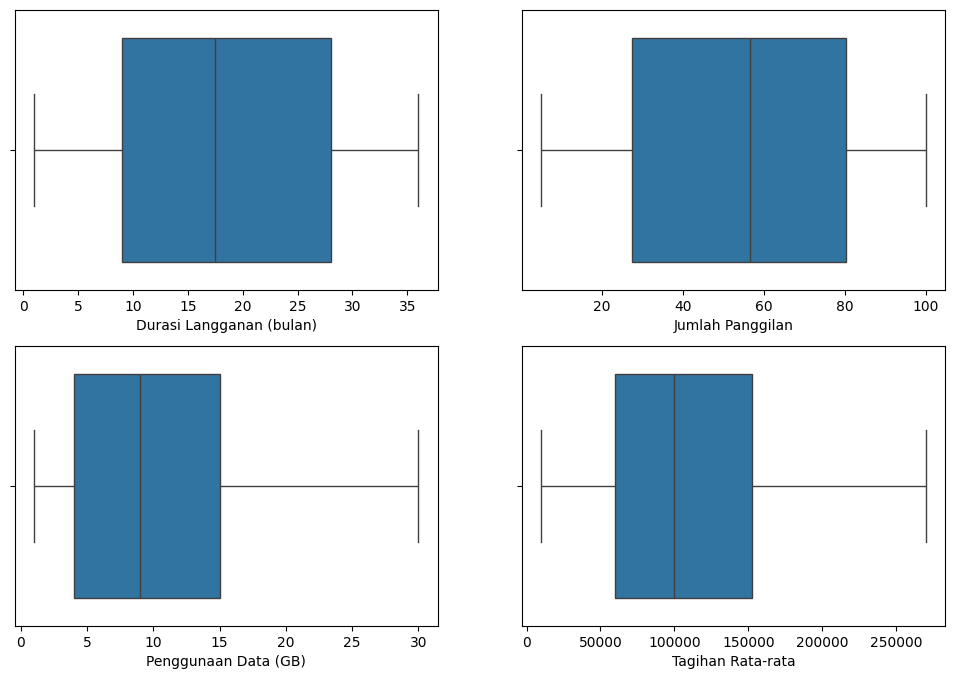

In [6]:
# Menghitung max dari nilai Durasi Langganan (bulan) yang bukan outlier
rerata = data2[(data2["Durasi Langganan (bulan)"] >= bw1) & (data2["Durasi Langganan (bulan)"] <= ba1)]["Durasi Langganan (bulan)"].max()
print("Nilai mean untuk mengganti outlier: ", rerata, "\n")
# Mengganti outlier dengan max
data2.loc[(data2["Durasi Langganan (bulan)"] < bw1) | (data2["Durasi Langganan (bulan)"] > ba1), "Durasi Langganan (bulan)"] = rerata

# Menghitung max dari nilai Jumlah Panggilan yang bukan outlier
rerata = data2[(data2["Jumlah Panggilan"] >= bw2) & (data2["Jumlah Panggilan"] <= ba2)]["Jumlah Panggilan"].max()
print("Nilai mean untuk mengganti outlier: ", rerata, "\n")
# Mengganti outlier dengan max
data2.loc[(data2["Jumlah Panggilan"] < bw2) | (data2["Jumlah Panggilan"] > ba2), "Jumlah Panggilan"] = rerata

# Menghitung max dari nilai Penggunaan Data (GB) yang bukan outlier
rerata = data2[(data2["Penggunaan Data (GB)"] >= bw3) & (data2["Penggunaan Data (GB)"] <= ba3)]["Penggunaan Data (GB)"].max()
print("Nilai mean untuk mengganti outlier: ", rerata, "\n")
# Mengganti outlier dengan max
data2.loc[(data2["Penggunaan Data (GB)"] < bw3) | (data2["Penggunaan Data (GB)"] > ba3), "Penggunaan Data (GB)"] = rerata

# Menghitung max dari nilai Tagihan Rata-rata yang bukan outlier
rerata = data2[(data2["Tagihan Rata-rata"] >= bw4) & (data2["Tagihan Rata-rata"] <= ba4)]["Tagihan Rata-rata"].max()
print("Nilai mean untuk mengganti outlier: ", rerata, "\n")
# Mengganti outlier dengan max
data2.loc[(data2["Tagihan Rata-rata"] < bw4) | (data2["Tagihan Rata-rata"] > ba4), "Tagihan Rata-rata"] = rerata


# mencari outlier
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Durasi Langganan (bulan)", data=data2, ax=axes[0, 0])
sns.boxplot(x="Jumlah Panggilan", data=data2, ax=axes[0, 1])
sns.boxplot(x="Penggunaan Data (GB)", data=data2, ax=axes[1, 0])
sns.boxplot(x="Tagihan Rata-rata", data=data2, ax=axes[1, 1])
plt.show()
# sns.boxplot(x="Tagihan Rata-rata", data=data2)
# plt.show()

Churn
0    54
1    46
Name: count, dtype: int64


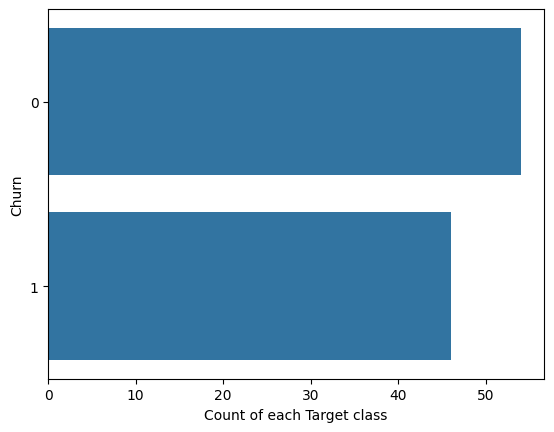

In [7]:
# visualisasi data hasil data preprocessing
print(data2['Churn'].value_counts())
sns.countplot(y=data2.Churn, data=data2)
plt.xlabel('Count of each Target class')
plt.ylabel('Churn')
plt.show()


In [8]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

# pemilihan fitur dan label
# X_before = data2.drop(['Churn'], axis=1).values
# y = data2['Churn'].values
X_before = data2.drop(['Churn'], axis=1)
y = data2['Churn']

# Normalisasi fitur
X = preprocessing.normalize(X_before)


print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}', '\n')

# buat fungsi K fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_indices = kf.split(X, y)
# buat fungsi K fold
# def kfold_indices(data, k):
#     fold_size = len(data) // k
#     indices = np.arange(len(data))
#     folds = []
#     for i in range(k):
#         test_indices = indices[i * fold_size: (i + 1) * fold_size]
#         train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
#         folds.append((train_indices, test_indices))
#     return folds

# # Define the number of folds (K)
# k = 10

# # Get the fold indices
# fold_indices = kfold_indices(X, k)


Dimensi Feature: (100, 5)
Class: {0, 1} 



In [26]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model decision tree
tree = DecisionTreeClassifier(random_state=45)

scores = []
classification_reports = []

for train_indices, test_indices in kf.split(X, y):
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    # Melatih model Random Forest
    tree.fit(X_train, y_train)
    
    # Prediksi
    y_pred = tree.predict(X_test)
    
    fold_score = accuracy_score(y_test, y_pred)

    scores.append(fold_score)
    
    # Mendapatkan classification report untuk setiap fold
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

# Menghitung rata-rata metrik dari semua fold
# Placeholder untuk menyimpan hasil rata-rata
average_report = {}

# Mendapatkan nama label dan metrik dari classification report pertama
labels = [label for label in classification_reports[0].keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
metrics = classification_reports[0][list(labels)[0]].keys()

# Menghitung rata-rata setiap metrik untuk setiap label
for label in labels:
    average_report[label] = {}
    for metric in metrics:
        # Menghitung rata-rata setiap metrik untuk setiap label
        avg_value = np.mean([report[label][metric] for report in classification_reports])
        average_report[label][metric] = round(avg_value, 4)

# Menghitung rata-rata untuk accuracy
average_report['accuracy'] = np.mean([report['accuracy'] for report in classification_reports])

mean_accuracy2 = np.mean(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy Tree:", mean_accuracy2, "\n")
# Menampilkan rata-rata classification report
df_average_report = pd.DataFrame(average_report).transpose()
print("Average Classification Report:\n", df_average_report)

K-Fold Cross-Validation Scores: [0.4, 0.6, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5, 0.5, 0.7]
Mean Accuracy Tree: 0.4600000000000001 

Average Classification Report:
           precision  recall  f1-score  support
0            0.4955    0.55    0.5163     5.40
1            0.3817    0.35    0.3591     4.60
accuracy     0.4600    0.46    0.4600     0.46


In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=3)
# inisialisasi untuk menyimpan evaluation scores
scores1 = []
classification_reports = []

for train_indices, test_indices in kf.split(X, y):
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    # Melatih model Random Forest
    knn.fit(X_train, y_train)
    
    # Prediksi
    y_pred = knn.predict(X_test)
    
    fold_score = accuracy_score(y_test, y_pred)

    scores1.append(fold_score)
    
    # Mendapatkan classification report untuk setiap fold
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

# Menghitung rata-rata metrik dari semua fold
# Placeholder untuk menyimpan hasil rata-rata
average_report = {}

# Mendapatkan nama label dan metrik dari classification report pertama
labels = [label for label in classification_reports[0].keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
metrics = classification_reports[0][list(labels)[0]].keys()

# Menghitung rata-rata setiap metrik untuk setiap label
for label in labels:
    average_report[label] = {}
    for metric in metrics:
        # Menghitung rata-rata setiap metrik untuk setiap label
        avg_value = np.mean([report[label][metric] for report in classification_reports])
        average_report[label][metric] = round(avg_value, 4)

# Menghitung rata-rata untuk accuracy
average_report['accuracy'] = np.mean([report['accuracy'] for report in classification_reports])

mean_accuracy2 = np.mean(scores1)
print("K-Fold Cross-Validation Scores:", scores1)
print("Mean Accuracy KNN:", mean_accuracy2, "\n")
# Menampilkan rata-rata classification report
df_average_report = pd.DataFrame(average_report).transpose()
print("Average Classification Report:\n", df_average_report)

K-Fold Cross-Validation Scores: [0.4, 0.7, 0.6, 0.7, 0.5, 0.5, 0.5, 0.7, 0.5, 0.5]
Mean Accuracy KNN: 0.5599999999999999 

Average Classification Report:
           precision  recall  f1-score  support
0            0.6651  0.5567    0.5525     5.40
1            0.4753  0.5650    0.4913     4.60
accuracy     0.5600  0.5600    0.5600     0.56


In [28]:
#random forest
from sklearn.ensemble import RandomForestClassifier

# Membuat model RF
rf = RandomForestClassifier(random_state=45)

scores2 = []
classification_reports = []

for train_indices, test_indices in kf.split(X, y):
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    # Melatih model Random Forest
    rf.fit(X_train, y_train)
    
    # Prediksi
    y_pred = rf.predict(X_test)
    
    fold_score = accuracy_score(y_test, y_pred)

    scores2.append(fold_score)
    
    # Mendapatkan classification report untuk setiap fold
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

# Menghitung rata-rata metrik dari semua fold
# Placeholder untuk menyimpan hasil rata-rata
average_report = {}

# Mendapatkan nama label dan metrik dari classification report pertama
labels = [label for label in classification_reports[0].keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
metrics = classification_reports[0][list(labels)[0]].keys()

# Menghitung rata-rata setiap metrik untuk setiap label
for label in labels:
    average_report[label] = {}
    for metric in metrics:
        # Menghitung rata-rata setiap metrik untuk setiap label
        avg_value = np.mean([report[label][metric] for report in classification_reports])
        average_report[label][metric] = round(avg_value, 4)

# Menghitung rata-rata untuk accuracy
average_report['accuracy'] = np.mean([report['accuracy'] for report in classification_reports])

mean_accuracy2 = np.mean(scores2)
print("K-Fold Cross-Validation Scores:", scores2)
print("Mean Accuracy RF:", mean_accuracy2, "\n")
# Menampilkan rata-rata classification report
df_average_report = pd.DataFrame(average_report).transpose()
print("Average Classification Report:\n", df_average_report)

K-Fold Cross-Validation Scores: [0.3, 0.6, 0.6, 0.7, 0.4, 0.4, 0.4, 0.5, 0.7, 0.8]
Mean Accuracy RF: 0.5399999999999999 

Average Classification Report:
           precision  recall  f1-score  support
0            0.5955  0.6067    0.5798     5.40
1            0.5192  0.4600    0.4669     4.60
accuracy     0.5400  0.5400    0.5400     0.54


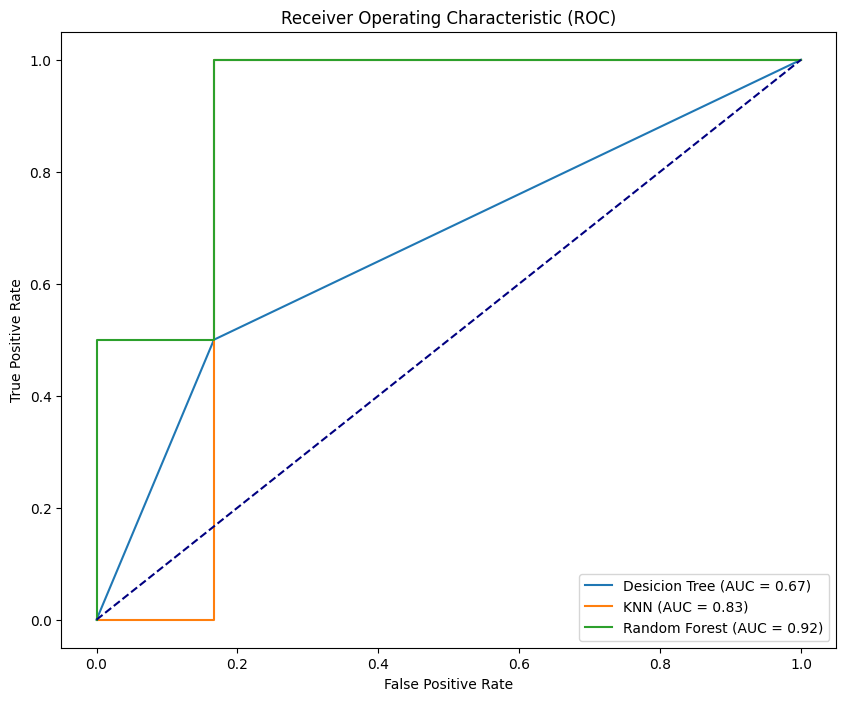

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

# Inisialisasi model
models = {
    'Desicion Tree': tree,
    'KNN': knn,
    'Random Forest': rf,
}

# Latih dan evaluasi model
plt.figure(figsize=(10, 8))

for name, model in models.items():
  scores = []

  # Iterate through each fold
  for train_indices, test_indices in kf.split(X, y):
      X_train, y_train = X[train_indices], y[train_indices]
      X_test, y_test = X[test_indices], y[test_indices]

      # melatih model
      model.fit(X_train, y_train)
      # buat prediksi
      y_prediksi = model.predict_proba(X_test)[:, 1]
      # Calculate accuracy for each fold
      fold_score = accuracy_score(y_test, model.predict(X_test))
      scores.append(fold_score)

  # Hitung ROC curve
  fpr, tpr, _ = roc_curve(y_test, y_prediksi)
  # Hitung AUC
  roc_auc = roc_auc_score(y_test, y_prediksi)
  # Plot ROC curve
  plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [30]:
new_data_before = [[23, 17, 5, 60000,0]]
new_data = preprocessing.normalize(new_data_before)
# Prediksi churn (0 = tidak churn, 1 = churn)
prediction = rf.predict(new_data)

# Hasil prediksi
if prediction[0] == 1:
    print("Pelanggan diprediksi churn.")
else:
    print("Pelanggan diprediksi tidak churn.")

# Prediksi probabilitas churn
prediction_proba = rf.predict_proba(new_data)

# Print probabilitas churn
print(f"Probabilitas tidak churn:  {prediction_proba[0][0]}")
print(f"Probabilitas churn: {prediction_proba[0][1]}")

Pelanggan diprediksi churn.
Probabilitas tidak churn:  0.28
Probabilitas churn: 0.72


In [31]:
# Membuat model RandomForest
rf = RandomForestClassifier(random_state=45)

scores2 = []
classification_reports = []
node_weights = []

for train_indices, test_indices in kf.split(X, y):
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    # Fit model
    rf.fit(X_train, y_train)

    # Prediksi
    y_pred = rf.predict(X_test)

    # Simpan akurasi dari fold saat ini
    fold_score = accuracy_score(y_test, y_pred)
    scores2.append(fold_score)

    # Simpan classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(class_report)
    
    # Simpan bobot node untuk visualisasi
    node_weights.append(rf.feature_importances_)

# Mean accuracy
mean_accuracy2 = np.mean(scores2)
print("K-Fold Cross-Validation Scores:", scores2)
print("Mean Accuracy RF:", mean_accuracy2)

# Kode 2: Visualisasi dengan Plotly
import plotly.graph_objs as go
import plotly.io as pio
import nbformat

# Mengambil bobot rata-rata dari node untuk visualisasi
avg_node_weight = np.mean(node_weights, axis=0)
tree_num = len(avg_node_weight)

# Koordinat dummy untuk visualisasi (dapat disesuaikan)
tree_x = np.random.rand(tree_num)
tree_y = np.random.rand(tree_num)

# Create a trace untuk scatter plot
node_trace = go.Scatter(
    x = tree_x,
    y = tree_y,
    mode = 'markers+text',
    text = list(range(tree_num)),
    textposition = 'bottom center',
    marker = {
        'colorscale': 'YlGnBu',
        'color': avg_node_weight,
        'showscale': True,
        'size': 10
    }
)

# Layout untuk plot
layout = go.Layout(
    title="Random Forest Node Weights Visualization",
    xaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    )
)

# Gabungkan data dan layout
data = [node_trace]
fig = go.Figure(data=data, layout=layout)

# Plot dan simpan dalam notebook
pio.show(fig, filename='node_weight-scatter')

K-Fold Cross-Validation Scores: [0.3, 0.6, 0.6, 0.7, 0.4, 0.4, 0.4, 0.5, 0.7, 0.8]
Mean Accuracy RF: 0.5399999999999999


In [16]:
import pickle
pickle.dump(rf, open("model2.pkl","wb"))